In [1]:
#importing all the necessary libraries and porjects 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../clean_data.csv')

In [3]:
df.head()

,Unnamed: 0,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,gender_map,race_ethnicity_map,parental level of education_map,lunch_map,test preparation course_map,total score,percentage,grades,grades_map
0,0,female,group B,bachelor's degree,standard,none,72,72,74,1,1,5,0,0,218,72.666667,First,1
1,1,female,group C,some college,standard,completed,69,90,88,1,2,4,0,1,247,82.333333,distinction,4
2,2,female,group B,master's degree,standard,none,90,95,93,1,1,3,0,0,278,92.666667,distinction,4
3,3,male,group A,associate's degree,free/reduced,none,47,57,44,0,0,2,1,0,148,49.333333,third,3
4,4,male,group C,some college,standard,none,76,78,75,0,2,4,0,0,229,76.333333,First,1


# Visualization

# Frequency distribution of Parental Level Of Education

In [4]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [5]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

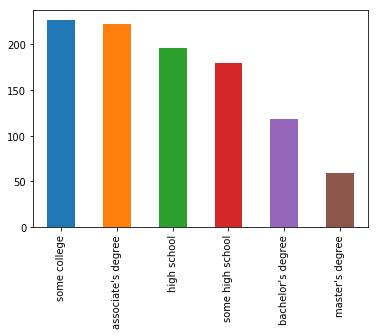

In [6]:
df['parental level of education'].value_counts().plot.bar()

# Parental level of education and Lunch

In [8]:
ple_lunch = pd.crosstab(df['parental level of education'],df['lunch'])
ple_lunch

lunch,free/reduced,standard
parental level of education,,
associate's degree,77,145
bachelor's degree,44,74
high school,70,126
master's degree,24,35
some college,79,147
some high school,61,118


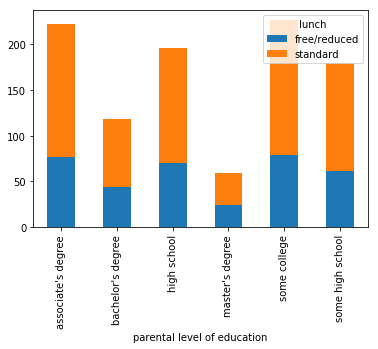

In [9]:
ple_lunch.plot.bar(stacked = True)

# Parental level of education and test preparation course

In [12]:
ple_test = df['test preparation course'].groupby(df['parental level of education']).value_counts()
ple_test

parental level of education  test preparation course
associate's degree           none                       140
                             completed                   82
bachelor's degree            none                        72
                             completed                   46
high school                  none                       140
                             completed                   56
master's degree              none                        39
                             completed                   20
some college                 none                       149
                             completed                   77
some high school             none                       102
                             completed                   77
Name: test preparation course, dtype: int64

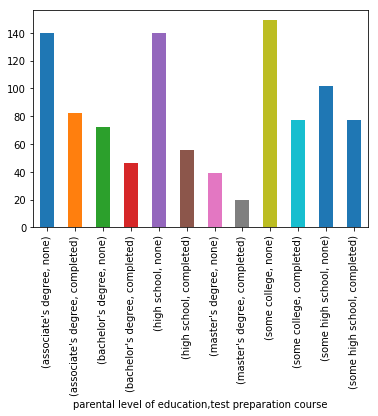

In [15]:
ple_test.plot.bar()

# Hypothesis 1 : Parental level of education with master's degree has the more students scoring more than average in math than other level of parental education

In [17]:
mean_math = df['math score'].mean()
mean_math

66.089

In [18]:
pd.crosstab(df['parental level of education'],df['math score'].mean())

col_0,66.089
parental level of education,
associate's degree,222
bachelor's degree,118
high school,196
master's degree,59
some college,226
some high school,179


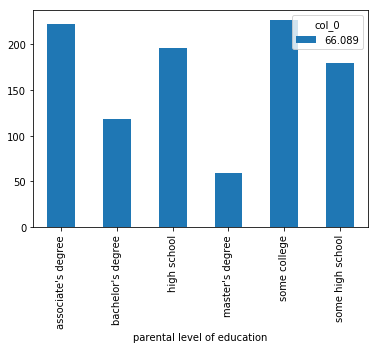

In [21]:
pd.crosstab(df['parental level of education'],df['math score'].mean()).plot.bar()

# Hypothesis 2 : students with parental level education , high school are likely to fail in reading